In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import itertools
import pandas as pd
from datetime import datetime

In [ ]:
sample=pd.read_csv("rec-amazon-ratings.edges",header=None,delimiter=" ")
sample

In [3]:
a=sample[sample[2]==5]
b=sample[sample[2]==4]
sample2=pd.concat([a,b],axis=0)

In [4]:
sample2

,0,1,2,3
0,1,1,5.0,1117404000
2,1,3,5.0,1105916400
5,1,6,5.0,1103497200
7,1,8,5.0,1074985200
8,1,9,5.0,1071961200
...,...,...,...,...
5838026,2146048,2874,4.0,1124488800
5838029,2146050,765079,4.0,1128981600
5838030,2146050,8732,4.0,1125525600
5838034,2146052,233344,4.0,1125871200


In [5]:
G = nx.Graph()
# Add edges and edge attributes
temp=0
now = datetime.now()
current_timea=now 
for i, elrow in sample2.iterrows():
    if (temp%450000==0):
        print(temp/450000,"/10-->",sep="")
        now = datetime.now()
        current_timeb=now   
        print("difference =", (current_timeb-current_timea))
        now = datetime.now()
        current_timea=now 
    temp=temp+1
    G.add_edge(elrow[0], elrow[1])

0.0/10-->
difference = 0:00:00.309171
1.0/10-->
difference = 0:00:35.021380
2.0/10-->
difference = 0:00:36.949218
3.0/10-->
difference = 0:00:35.330557
4.0/10-->
difference = 0:00:35.331558
5.0/10-->
difference = 0:00:39.430139
6.0/10-->
difference = 0:00:44.115052
7.0/10-->
difference = 0:00:36.187256
8.0/10-->
difference = 0:00:35.139449
9.0/10-->
difference = 0:00:42.457496
10.0/10-->
difference = 0:00:39.056587


In [6]:
#G = nx.read_edgelist("rec-amazon-ratings.edges",  create_using=nx.DiGraph,nodetype= int).to_undirected()
print("full_data except rating under 4")
print ("number of nodes :",len(G.nodes))  
print ("number of edges :",len(G.edges))  

full_data except rating under 4
number of nodes : 1937490
number of edges : 4454690


In [7]:
G1=G.copy()
for i in list(G1.nodes):
    check=np.random.randint(10)
    if not check==2:
        G1.remove_node(i)

print("%10 sample of full_data")
print ("number of nodes :",len(G1.nodes))  
print ("number of edges :",len(G1.edges))  
nx.write_edgelist(G1, "G1_aftersampling.edgelist")

%10 sample of full_data
number of nodes : 193756
number of edges : 44422


In [9]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G2 = G1.subgraph(Gcc[0])

print("giant component of %10 sample of full_data")
print ("number of nodes :",len(G2.nodes))  
print ("number of edges :",len(G2.edges)) 
nx.write_edgelist(G2, "G2_aftergiant.edgelist") 

giant component of %10 sample of full_data
number of nodes : 190198
number of edges : 44206


In [10]:
G2=nx.Graph(G2)

In [11]:
deg = dict(nx.degree(G2))
sorteddeg = sorted(deg.items(), key=lambda x: x[1], reverse=False)
small_deg=[]
for k, v in sorteddeg:
    if v<3:
        G2.remove_node(k)
print("only degree greater than 3 of giant component of %50 sample of full_data")
print ("number of nodes :",len(G2.nodes))  
print ("number of edges :",len(G2.edges))  

only degree greater than 3 of giant component of %50 sample of full_data
number of nodes : 6054
number of edges : 8763


In [12]:
Gcc = sorted(nx.connected_components(G2), key=len, reverse=True)
G3 = G2.subgraph(Gcc[0])
print("giant component of only degree greater than 2 of giant component of %50 sample of full_data")
print ("number of nodes :",len(G3.nodes))  
print ("number of edges :",len(G3.edges))  

giant component of only degree greater than 2 of giant component of %50 sample of full_data
number of nodes : 5009
number of edges : 8627


# NO NEED TO DO OPERATIONS BELOW

In [13]:
G3= nx.read_edgelist("Full.edgelist", create_using= nx.DiGraph, nodetype= float).to_undirected()
print("Full data")
print ("number of nodes :",len(G3.nodes))  
print ("number of edges :",len(G3.edges)) 

Full data
number of nodes : 5225
number of edges : 8972


In [3]:
G3= nx.read_edgelist("Full.edgelist", create_using= nx.DiGraph, nodetype= float).to_undirected()
print("Full data")
print ("number of nodes :",len(G3.nodes))  
print ("number of edges :",len(G3.edges)) 

Full data
number of nodes : 5225
number of edges : 8972


In [4]:
def train_Test_Graph(Graph,splitsize):
    allEdges = []
    testEdges = []
    for edge in Graph.edges():
        pair = edge

        # Ensure that tuple (u,v) u < v
        if pair[0] > pair[1]:
            allEdges.append((pair[1], pair[0]))
        else:
            allEdges.append((pair[0], pair[1]))

    numTest = int(len(allEdges) * splitsize)

    # sample 10% current edges
    testEdgesInd = np.random.choice(range(len(allEdges)), numTest, replace=False)
    Gtest = nx.Graph()  
    for ind in testEdgesInd:
        pair = allEdges[ind]
        testEdges.append(pair)
        Graph.remove_edge(pair[0], pair[1])   
        #Gtest.add_edge(pair[0], pair[1])
    
        
    #return Gtest
    return testEdges

In [5]:
test_split=0.2
Gtest=train_Test_Graph(G3,test_split)
print("Train data")
print ("number of nodes :",len(G3.nodes))  
print ("number of edges :",len(G3.edges)) 

print("\nTest data")
#print ("number of nodes :",len(Gtest.nodes))  
#print ("number of edges :",len(Gtest.edges)) 
print("number of edges : ",len(list(Gtest)))

Train data
number of nodes : 5225
number of edges : 7178

Test data
number of edges :  1794


In [6]:
def simrank(G, c=0.8, max_iter=10, eps=1e-4):
    is_directed = G.is_directed()
    if is_directed:
        print("Directed version is running")
    else:
        print("Undirected version is running")

    nodes = G.nodes()
    nodes_i = {k: v for (k, v) in [(list(nodes)[i], i) for i in range(len(nodes))]}
    #print("Nodes:", nodes)
    #print("Node indices:", nodes_i)
    
    sim_prev = np.zeros(len(nodes))
    sim = np.identity(len(nodes))
    now = datetime.now()
    current_timea=now 
    for i in range(max_iter):
        
        if np.allclose(sim, sim_prev, atol=eps):
            break
        sim_prev = np.copy(sim)
        # get cross product of the nodes
        for u, v in itertools.product(nodes, nodes):
            if u is v:
                continue
            
            if is_directed:
                # return dict_keyiterator -> has no len()
                u_ns, v_ns = list(G.predecessors(u)), list(G.predecessors(v))
            else:
                u_ns, v_ns = list(G.neighbors(u)), list(G.neighbors(v))

            # evaluating the similarity of current iteration nodes pair
            if len(u_ns) == 0 or len(v_ns) == 0: 
                # if a node has no predecessors then setting similarity to zero
                sim[nodes_i[u]][nodes_i[v]] = 0
            else:
                # sum up the similarities of the neighboring nodes (predecessor in directed graphs)
                s_uv = sum([sim_prev[nodes_i[u_n]][nodes_i[v_n]] for u_n, v_n in itertools.product(u_ns, v_ns)])
                # update similarity of the node pairs
                sim[nodes_i[u]][nodes_i[v]] = (c * s_uv) / (len(u_ns) * len(v_ns))
        now = datetime.now()
        current_timeb=now 
        print("difference =", (current_timeb-current_timea))
        now = datetime.now()
        current_timea=now 
        print("iter ",(i+1)," of ",max_iter," completed")
    return sim

In [7]:
def adamrank(G, c=0.8, max_iter=10, eps=1e-4):
    is_directed = G.is_directed()
    if is_directed:
        print("Directed version is running")
    else:
        print("Undirected version is running")

    nodes = G.nodes()
    nodes_i = {k: v for (k, v) in [(list(nodes)[i], i) for i in range(len(nodes))]}
    #print("Nodes:", nodes)
    #print("Node indices:", nodes_i)
    
    sim_prev = np.zeros(len(nodes))
    sim = np.identity(len(nodes))
    now = datetime.now()
    current_timea=now       
  
    for u, v in itertools.product(nodes, nodes):
        if u is v:
            continue
            
            
                
        preds= nx.adamic_adar_index(G, [(u,v)]) 
        u,v,p=next(preds)
        aa = p
            
        sim[nodes_i[u]][nodes_i[v]] = aa
            
        now = datetime.now()
        current_timeb=now 
        #print("difference =", (current_timeb-current_timea))
        now = datetime.now()
        current_timea=now 
        #print("iter ",(i+1)," of ",max_iter," completed")
    return sim

In [8]:
def prefrank(G, c=0.8, max_iter=10, eps=1e-4):
    is_directed = G.is_directed()
    if is_directed:
        print("Directed version is running")
    else:
        print("Undirected version is running")

    nodes = G.nodes()
    nodes_i = {k: v for (k, v) in [(list(nodes)[i], i) for i in range(len(nodes))]}
    #print("Nodes:", nodes)
    #print("Node indices:", nodes_i)
    
    sim_prev = np.zeros(len(nodes))
    sim = np.identity(len(nodes))
    now = datetime.now()
    current_timea=now       
  
    for u, v in itertools.product(nodes, nodes):
        if u is v:
            continue
            
            
                
        preds= nx.preferential_attachment(G, [(u,v)]) 
        u,v,p=next(preds)
        aa = p
            
        sim[nodes_i[u]][nodes_i[v]] = aa
            
        now = datetime.now()
        current_timeb=now 
        #print("difference =", (current_timeb-current_timea))
        now = datetime.now()
        current_timea=now 
        #print("iter ",(i+1)," of ",max_iter," completed")
    return sim

In [12]:
def jacrank(G, c=0.8, max_iter=10, eps=1e-4):
    is_directed = G.is_directed()
    if is_directed:
        print("Directed version is running")
    else:
        print("Undirected version is running")

    nodes = G.nodes()
    nodes_i = {k: v for (k, v) in [(list(nodes)[i], i) for i in range(len(nodes))]}
    #print("Nodes:", nodes)
    #print("Node indices:", nodes_i)
    
    sim_prev = np.zeros(len(nodes))
    sim = np.identity(len(nodes))
    now = datetime.now()
    current_timea=now       
  
    for u, v in itertools.product(nodes, nodes):
        if u is v:
            continue
            
            
                
        preds= nx.jaccard_coefficient(G, [(u,v)]) 
        u,v,p=next(preds)
        aa = p
            
        sim[nodes_i[u]][nodes_i[v]] = aa
            
        now = datetime.now()
        current_timeb=now 
        #print("difference =", (current_timeb-current_timea))
        now = datetime.now()
        current_timea=now 
        #print("iter ",(i+1)," of ",max_iter," completed")
    return sim

In [ ]:
simscores = simrank(G3)
print("simscores has been found")
nodes = G3.nodes()
nodes_i = {k: v for (k, v) in [(list(nodes)[i], i) for i in range(len(nodes))]}

In [ ]:
thresholds=[0.75,0.5,0.25,0.1,0.05,0.01,0.005,0.001,0.0005]
var=simscores.shape[0]*simscores.shape[1]
precisions=[]
recalls=[]
accuracies=[]
now = datetime.now()
current_timea=now 
for threshold in thresholds:
    preds=[]
  
    #threshold=0.0001
    print("predictions for threshold ",str(threshold))
    for i in list(G3.nodes):
        for j in list(G3.nodes):
            if simscores[nodes_i[i],nodes_i[j]]>threshold:
                preds.append([i,j])

    print("predictions has been found")           
    temp=0
    for i in preds:
        for j in Gtest:
            if i[0]==j[0] and i[1]==j[1]:
              #print(i,",",j)
                temp=temp+1

    print("threshold : ",threshold," completed")
    prec=temp/len(preds)
    print("precision : ",prec)
    precisions.append(prec)
    reca=temp/len(Gtest)
    print("recall : ",reca)
    recalls.append(reca)
    accur=(var-len(preds)+temp)/(var+len(Gtest)-temp)
    print("accuracy : ",accur)
    accuracies.append(accur)
    now = datetime.now()
    current_timeb=now 
    print("difference =", (current_timeb-current_timea))
    now = datetime.now()
    current_timea=now 

plt.plot(thresholds,precisions,label="precision")
plt.plot(thresholds,recalls,label="recalls")
plt.plot(thresholds,accuracies,label="accuracies")
plt.title("Precision-Recall-Accuracy vs Simrank thresholds")
plt.xlabel("Thresholds")
plt.ylabel("Precision-Recall-Accuracy Values")
plt.legend()
plt.show()
pd.DataFrame({'threshold':thresholds,'precisions':precisions,"recalls":recalls,"accuracies":accuracies}).to_csv('Simrank.csv',index=False,sep=",")

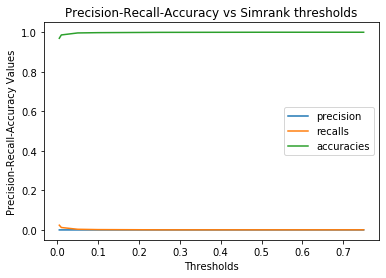

In [19]:
thresholds=[0.75,0.5,0.25,0.1,0.05,0.01,0.005]
plt.plot(thresholds,precisions,label="precision")
plt.plot(thresholds,recalls,label="recalls")
plt.plot(thresholds,accuracies,label="accuracies")
plt.title("Precision-Recall-Accuracy vs Simrank thresholds")
plt.xlabel("Thresholds")
plt.ylabel("Precision-Recall-Accuracy Values")
plt.legend()
plt.show()
pd.DataFrame({'threshold':thresholds,'precisions':precisions,"recalls":recalls,"accuracies":accuracies}).to_csv('Simrank.csv',index=False,sep=",")

In [ ]:
simscores = prefrank(G3)
print("simscores has been found")
nodes = G3.nodes()
nodes_i = {k: v for (k, v) in [(list(nodes)[i], i) for i in range(len(nodes))]}

In [36]:
simscores2=simscores/np.max(simscores)
np.max(simscores2)

predictions for threshold  0.75
predictions has been found
threshold :  0.75  completed
precision :  0.0
recall :  0.0
accuracy :  0.9999341450294202
difference = 0:00:15.303095
predictions for threshold  0.5
predictions has been found
threshold :  0.5  completed
precision :  0.0
recall :  0.0
accuracy :  0.9999338520150907
difference = 0:00:14.186083
predictions for threshold  0.25
predictions has been found
threshold :  0.25  completed
precision :  0.0
recall :  0.0
accuracy :  0.999931727661201
difference = 0:00:13.654541
predictions for threshold  0.1
predictions has been found
threshold :  0.1  completed
precision :  0.010736196319018405
recall :  0.0039018952062430325
accuracy :  0.9999109236209607
difference = 0:00:15.269152
predictions for threshold  0.05
predictions has been found
threshold :  0.05  completed
precision :  0.005852231163130944
recall :  0.008918617614269788
accuracy :  0.9998353258502557
difference = 0:00:16.249803
predictions for threshold  0.01
predictions ha

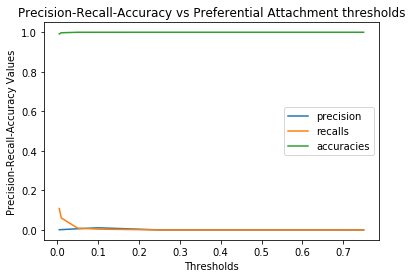

In [38]:
var=simscores2.shape[0]*simscores2.shape[1]
thresholds=[0.75,0.5,0.25,0.1,0.05,0.01,0.005]
precisions=[]
recalls=[]
accuracies=[]
now = datetime.now()
current_timea=now 
for threshold in thresholds:
    preds=[]
  
    #threshold=0.0001
    print("predictions for threshold ",str(threshold))
    for i in list(G3.nodes):
        for j in list(G3.nodes):
            if simscores2[nodes_i[i],nodes_i[j]]>threshold:
                preds.append([i,j])

    print("predictions has been found")           
    temp=0
    for i in preds:
        for j in Gtest:
            if i[0]==j[0] and i[1]==j[1]:
              #print(i,",",j)
                temp=temp+1

    print("threshold : ",threshold," completed")
    prec=temp/len(preds)
    print("precision : ",prec)
    precisions.append(prec)
    reca=temp/len(Gtest)
    print("recall : ",reca)
    recalls.append(reca)
    accur=(var-len(preds)+temp)/(var+len(Gtest)-temp)
    print("accuracy : ",accur)
    accuracies.append(accur)
    now = datetime.now()
    current_timeb=now 
    print("difference =", (current_timeb-current_timea))
    now = datetime.now()
    current_timea=now 
    
plt.plot(thresholds,precisions,label="precision")
plt.plot(thresholds,recalls,label="recalls")
plt.plot(thresholds,accuracies,label="accuracies")
plt.title("Precision-Recall-Accuracy vs Preferential Attachment thresholds")
plt.xlabel("Thresholds")
plt.ylabel("Precision-Recall-Accuracy Values")
plt.legend()
plt.show()
pd.DataFrame({'threshold':thresholds,'precisions':precisions,"recalls":recalls,"accuracies":accuracies}).to_csv('Preferential_Attachment.csv',index=False,sep=",")

Undirected version is running
simscores has been found
predictions for threshold  0.75
predictions has been found
threshold :  0.75  completed
precision :  0.0001352265043948614
recall :  0.0005574136008918618
accuracy :  0.9996635096569102
difference = 0:00:15.326033
predictions for threshold  0.5
predictions has been found
threshold :  0.5  completed
precision :  0.00013363624214887077
recall :  0.0005574136008918618
accuracy :  0.9996602864991665
difference = 0:00:15.139535
predictions for threshold  0.25
predictions has been found
threshold :  0.25  completed
precision :  7.130378979642769e-05
recall :  0.0011148272017837235
accuracy :  0.9989070930972888
difference = 0:00:19.620556
predictions for threshold  0.1
predictions has been found
threshold :  0.1  completed
precision :  4.630755160397782e-05
recall :  0.002229654403567447
accuracy :  0.9967707984806472
difference = 0:00:31.435970
predictions for threshold  0.05
predictions has been found
threshold :  0.05  completed
preci

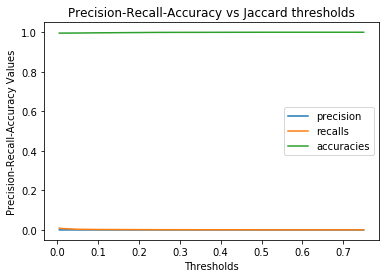

In [39]:
simscores = jacrank(G3)
print("simscores has been found")
nodes = G3.nodes()
nodes_i = {k: v for (k, v) in [(list(nodes)[i], i) for i in range(len(nodes))]}

simscores2=simscores/np.max(simscores)
np.max(simscores2)

var=simscores2.shape[0]*simscores2.shape[1]
thresholds=[0.75,0.5,0.25,0.1,0.05,0.01,0.005]
precisions=[]
recalls=[]
accuracies=[]
now = datetime.now()
current_timea=now 
for threshold in thresholds:
    preds=[]
  
    #threshold=0.0001
    print("predictions for threshold ",str(threshold))
    for i in list(G3.nodes):
        for j in list(G3.nodes):
            if simscores2[nodes_i[i],nodes_i[j]]>threshold:
                preds.append([i,j])

    print("predictions has been found")           
    temp=0
    for i in preds:
        for j in Gtest:
            if i[0]==j[0] and i[1]==j[1]:
              #print(i,",",j)
                temp=temp+1

    print("threshold : ",threshold," completed")
    prec=temp/len(preds)
    print("precision : ",prec)
    precisions.append(prec)
    reca=temp/len(Gtest)
    print("recall : ",reca)
    recalls.append(reca)
    accur=(var-len(preds)+temp)/(var+len(Gtest)-temp)
    print("accuracy : ",accur)
    accuracies.append(accur)
    now = datetime.now()
    current_timeb=now 
    print("difference =", (current_timeb-current_timea))
    now = datetime.now()
    current_timea=now 
    
plt.plot(thresholds,precisions,label="precision")
plt.plot(thresholds,recalls,label="recalls")
plt.plot(thresholds,accuracies,label="accuracies")
plt.title("Precision-Recall-Accuracy vs Jaccard thresholds")
plt.xlabel("Thresholds")
plt.ylabel("Precision-Recall-Accuracy Values")
plt.legend()
plt.show()
pd.DataFrame({'threshold':thresholds,'precisions':precisions,"recalls":recalls,"accuracies":accuracies}).to_csv('Jaccard.csv',index=False,sep=",")

Undirected version is running
simscores has been found
predictions for threshold  0.75
predictions has been found
threshold :  0.75  completed
precision :  0.0
recall :  0.0
accuracy :  0.9999339985222555
difference = 0:00:30.288563
predictions for threshold  0.5
predictions has been found
threshold :  0.5  completed
precision :  0.0
recall :  0.0
accuracy :  0.9999339252686731
difference = 0:00:29.352508
predictions for threshold  0.25
predictions has been found
threshold :  0.25  completed
precision :  0.0
recall :  0.0
accuracy :  0.999930995125377
difference = 0:00:30.199889
predictions for threshold  0.1
predictions has been found
threshold :  0.1  completed
precision :  0.0002247443532981234
recall :  0.0011148272017837235
accuracy :  0.9996084962001716
difference = 0:00:33.689530
predictions for threshold  0.05
predictions has been found
threshold :  0.05  completed
precision :  0.00018722501326177176
recall :  0.0033444816053511705
accuracy :  0.9987609520081613
difference = 0:

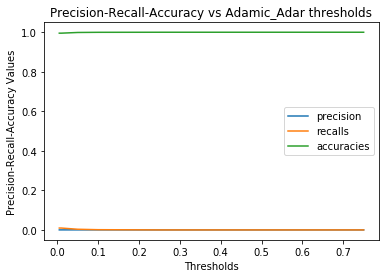

In [40]:
simscores = adamrank(G3)
print("simscores has been found")
nodes = G3.nodes()
nodes_i = {k: v for (k, v) in [(list(nodes)[i], i) for i in range(len(nodes))]}
simscores2=simscores/np.max(simscores)

var=simscores2.shape[0]*simscores2.shape[1]
thresholds=[0.75,0.5,0.25,0.1,0.05,0.01,0.005]
precisions=[]
recalls=[]
accuracies=[]
now = datetime.now()
current_timea=now 
for threshold in thresholds:
    preds=[]
  
    #threshold=0.0001
    print("predictions for threshold ",str(threshold))
    for i in list(G3.nodes):
        for j in list(G3.nodes):
            if simscores2[nodes_i[i],nodes_i[j]]>threshold:
                preds.append([i,j])

    print("predictions has been found")           
    temp=0
    for i in preds:
        for j in Gtest:
            if i[0]==j[0] and i[1]==j[1]:
              #print(i,",",j)
                temp=temp+1

    print("threshold : ",threshold," completed")
    prec=temp/len(preds)
    print("precision : ",prec)
    precisions.append(prec)
    reca=temp/len(Gtest)
    print("recall : ",reca)
    recalls.append(reca)
    accur=(var-len(preds)+temp)/(var+len(Gtest)-temp)
    print("accuracy : ",accur)
    accuracies.append(accur)
    now = datetime.now()
    current_timeb=now 
    print("difference =", (current_timeb-current_timea))
    now = datetime.now()
    current_timea=now 

plt.plot(thresholds,precisions,label="precision")
plt.plot(thresholds,recalls,label="recalls")
plt.plot(thresholds,accuracies,label="accuracies")
plt.title("Precision-Recall-Accuracy vs Adamic_Adar thresholds")
plt.xlabel("Thresholds")
plt.ylabel("Precision-Recall-Accuracy Values")
plt.legend()
plt.show()
pd.DataFrame({'threshold':thresholds,'precisions':precisions,"recalls":recalls,"accuracies":accuracies}).to_csv('Adamic_Adar.csv',index=False,sep=",")

In [ ]:
print("completed")